<a href="https://colab.research.google.com/github/shreya0202/SentimentAnalysis/blob/master/NLP_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import pandas library for reading the dataset
import pandas as pd

#import sklearn model selection package to split data into train and test models
from sklearn.model_selection import train_test_split

#import numpy library for data manipulation
import numpy as np

In [4]:
#Import Natural Language Toolkit
import nltk

nltk.download('punkt')
nltk.download('stopwords') #For stop words removal
nltk.download('wordnet') #For lemmatizing
nltk.download('tagsets') #Help with any nltk tag
nltk.download('averaged_perceptron_tagger') #For POS tagging

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [5]:
#reading CSV file and storing in a variable
dataset = pd.read_csv('/content/drive/My Drive/rotten_tomato.csv')

#removing null values
dataset = dataset.dropna()

print("Here are the first 10 rows of the dataset: ")
#printing first 10 records of dataset
dataset.head(10)

Here are the first 10 rows of the dataset: 


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [6]:
dataset.groupby('Sentiment')['PhraseId'].nunique()

Sentiment
0     7072
1    27273
2    79582
3    32927
4     9206
Name: PhraseId, dtype: int64

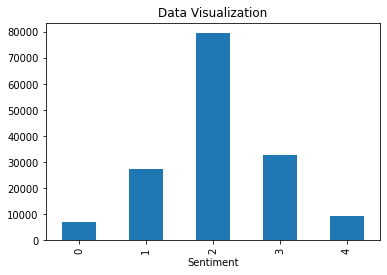

In [7]:
import matplotlib.pyplot as plt

dataset.groupby('Sentiment')['PhraseId'].nunique().plot(kind='bar')
plt.title('Data Visualization')
plt.show()

In [9]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer,LancasterStemmer
from nltk.tokenize import word_tokenize

X = dataset['Phrase']
Y = dataset['Sentiment']

stopwords_en = set(stopwords.words('english'))
porter = PorterStemmer()
lancaster = LancasterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

punctuations = "?:!.,;()-/\""

remove_punctuations = True
remove_stopwords = True
useLemma = True
useStem = False


X = X.values
Y = Y.values

reviews = X

for review in range(len(X)):
    tmp_review = []
    for word in word_tokenize(X[review]):
        new_word = word
        if remove_stopwords and (word in stopwords_en):
            continue
        if remove_punctuations and (word in punctuations):
            continue
        if useStem:
            new_word = lancaster.stem(new_word)
        if useLemma:
            new_word = wordnet_lemmatizer.lemmatize(new_word)

        tmp_review.append(new_word)

    reviews[review] = ' '.join(tmp_review)

    if(review % 10000 == 0):
        print(str(review) + " records processed.")



x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=2003)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

0 records processed.
10000 records processed.
20000 records processed.
30000 records processed.
40000 records processed.
50000 records processed.
60000 records processed.
70000 records processed.
80000 records processed.
90000 records processed.
100000 records processed.
110000 records processed.
120000 records processed.
130000 records processed.
140000 records processed.
150000 records processed.
(109242,)
(109242,)
(46818,)
(46818,)


In [0]:
#for one hot encoding
from sklearn.preprocessing import LabelBinarizer 
import numpy as np
from itertools import chain

In [0]:
# new_df = pd.DataFrame(y_train, columns=['Sentiment'])

# # new_df.index.name = 'Id'

# new_df.groupby('Sentiment')[new_df.index.name].nunique()

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1, 1))
#bigram_vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1, 2))
#trigram_vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1, 3))
vec_len = 1000 #<set_a_length_of_your_choice>
count_vectorizer = CountVectorizer(max_features=vec_len)
encoder = LabelBinarizer()

#count_vectorizer = CountVectorizer(stop_words="english", ngram_range=(1, 1))
X = count_vectorizer.fit_transform(dataset['Phrase'])
Y = dataset['Sentiment']
x_train = count_vectorizer.transform(x_train)
y_train = encoder.fit_transform(y_train)
x_test = count_vectorizer.transform(x_test)
y_test = encoder.transform(y_test)



In [0]:
x_train_np = x_train.toarray()
y_train_np = np.array(y_train)

x_test_np = x_test.toarray()
y_test_np = np.array(y_test)


In [0]:
import torch
torch.manual_seed(2020)

from torch.nn import Conv1d, MaxPool1d, Flatten, Linear

from torch.nn.functional import relu, softmax, sigmoid

from torch.utils.data import DataLoader, TensorDataset

In [0]:
class CnnRegressor(torch.nn.Module):
  #defining initialization method
  def __init__(self, batch_size, inputs, outputs):
    #initializing super class and storing parameters
    super(CnnRegressor, self).__init__()
    self.batch_size = batch_size
    self.inputs = inputs
    self.outputs = outputs
    #defining input layer with kernel size 1
    self.input_layer = Conv1d(inputs, batch_size,1)
    #defining max pooling layer with kernel size 1
    self.max_pooling_layer = MaxPool1d(1)
    #defining convolution layer with kernel size 1
    self.conv_layer = Conv1d(batch_size, 128, 1)
    #defining max pooling layer with kernel size 1
    self.max_pooling_1 = MaxPool1d(1)
    #defining convolution layer with kernel size 1
    self.conv_layer_1 = Conv1d(128, 256, 1)
    #defining flatten layer
    self.flatten_layer = Flatten()
    #defining sequential layer
    self.linear_layer = Linear(256, 64)
    #defining sequential output layer
    self.output_layer = Linear(64, outputs)
    self.softmax = torch.nn.Softmax()
    #self.sigmoid = torch.nn.Sigmoid()
    #tensor.sigmoid

#method to feed inputs to the model
  def feed(self, input):
    #reshaping the input to be feed to the input layer
    input = input.reshape((self.batch_size, self.inputs, 1))
    #passing the input through relu function and getting output for first layer
    output = relu(self.input_layer(input))
    #passing output of the first layer as input in max pooling layer
    output = self.max_pooling_layer(output)
    #passing the input through relu function and getting output for second layer
    output = relu(self.conv_layer(output))
    #passing output of the second layer as input in max pooling layer
    output = self.max_pooling_1(output)
    #passing the input through relu function and getting output for third layer
    output = relu(self.conv_layer_1(output))
    #getting output for flatten layer
    output = self.flatten_layer(output)
    #getting output for linear layer
    output = self.linear_layer(output)
    #getting final output
    output = self.output_layer(output)

    #output = sigmoid(output)
    output_softmax = self.softmax(output)
    output_ = torch.round(output_softmax)
    

    return output_softmax, output_



In [41]:
#Stochastic gradient descent package
from torch.optim import Rprop, Adam

#mean absolute error loss
#from torch.nn import L1Loss
#Cross ENtropy Loss for CLassification Problems
from torch.nn import CrossEntropyLoss
!pip install pytorch-ignite
# from ignite.contrib.metrics.regression.r2_score import R2Score
from ignite.metrics import Accuracy, Recall, Precision

In [42]:
batch_size = 64
model = CnnRegressor(batch_size, x_train.shape[1], 5)
model.cuda()

CnnRegressor(
  (input_layer): Conv1d(1000, 64, kernel_size=(1,), stride=(1,))
  (max_pooling_layer): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer): Conv1d(64, 128, kernel_size=(1,), stride=(1,))
  (max_pooling_1): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer_1): Conv1d(128, 256, kernel_size=(1,), stride=(1,))
  (flatten_layer): Flatten()
  (linear_layer): Linear(in_features=256, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=5, bias=True)
  (softmax): Softmax(dim=None)
)

In [0]:
#method to return MSE and R^2 scores
def model_loss(model, dataset, train = False, optimizer = None):
  #performance = L1Loss()
  performance=CrossEntropyLoss().cuda()
  accu = Accuracy()
  prec = Precision()
  rec = Recall()
  avg_accu = 0
  avg_rec = 0
  avg_prec = 0
  avg_loss = 0
  count = 0
  for input, output in iter(dataset):
    #getting prediction for training dataset
    #predictions, predictions_ = model.feed(input)
    predictions, predictions_ = model.feed(input)
    #tmp_op = output.toarray()
    tmp_op = output.argmax(dim = 1).squeeze(0)
    # labels = np.argmax(tmp_op, axis=1)
    # op = torch.from_numpy(labels).cuda().float()
    #Get the expected output 
    # expected=-1
    # for index in range(len(tmp_op)):
    #   if tmp_op[index]==1:
    #     expected = index
    #     break
    # expected = torch.tensor(expected).unsqueeze(0).cuda()

    #getting the MSE loss
    #loss = performance(predictions, output)

    #getting Cross Entropy Loss
    loss = performance(predictions,tmp_op)

    accu.update([predictions_, output])
    tmp_accu = accu.compute()

    prec.update([predictions_, output])
    tmp_prec = prec.compute()

    rec.update([predictions_, output])
    tmp_rec = rec.compute()

    if(train):
      #clear errors
      optimizer.zero_grad()
      #compute gradients
      loss.backward()
      #update parameters based on gradients
      optimizer.step()
    
    #storing the loss and updating counter
    avg_loss += loss.item()
    avg_accu += tmp_accu
    avg_prec += tmp_prec.item()
    avg_rec += tmp_rec.item()
    count += 1
 #returning Average accuracy, Precision, Recall per count
  return avg_loss/count, avg_accu / count, avg_prec / count, avg_rec / count

In [35]:
y_train_np.shape

(109242, 5)

In [91]:
import os

if '1105134_sentiment_analysis.pth' in os.listdir('/content/drive/My Drive/'):
  #code to load the trained model
  model.load_state_dict(torch.load('/content/drive/My Drive/1105134_sentiment_analysis.pth'))
  model.eval()
  #Block to obtain test loss
  optimizer = Rprop(model.parameters(), lr=1e-5)
  optimizer_ = Adam(model.parameters(), lr=1e-5)
  inputs = torch.from_numpy(x_test_np).cuda().float()
  outputs = torch.from_numpy(y_test_np).cuda().float()
  print(inputs.size())
  print(outputs.size())
  tensor = TensorDataset(inputs, outputs)
  loader = DataLoader(tensor, batch_size, shuffle=True, drop_last=True)
  avg_loss, avg_accu, avg_prec, avg_rec = model_loss(model, loader, train=False, optimizer=optimizer)
  av_loss, av_accu, av_prec, av_rec = model_loss(model, loader, train=False, optimizer=optimizer_)
  f1 = (2*(avg_prec*avg_rec)/(avg_rec + avg_prec))
  f1_adam = (2*(av_prec*av_rec)/(av_rec + av_prec))
  print("Rprop: The Testing Resulting Average Loss = " + str(avg_loss) + "\n\tAccuracy = " + str(avg_accu) + "\n\tAverage Precision = " + str(avg_prec) + "\n\tAverage Recall = " + str(avg_rec) +  "\n\tF1 score = " + str(f1))
  print("Adam: The Testing Resulting Average Loss = " + str(avg_loss) +"\n\tAccuracy = " + str(av_accu) + "\n\tAverage Precision = " + str(av_prec) + "\n\tAverage Recall = " + str(av_rec) +  "\n\tF1 score = " + str(f1_adam))

else:
    epochs = 200
    optimizer = Rprop(model.parameters(), lr=1e-5)
    optimizer_ = Adam(model.parameters(), lr=1e-5)
    inputs = torch.from_numpy(x_train_np).cuda().float()
    outputs = torch.from_numpy(y_train_np).cuda().float()
    print(inputs.size())
    print(outputs.size())
    tensor = TensorDataset(inputs, outputs)
    loader = DataLoader(tensor, batch_size, shuffle=True, drop_last=True)
    accuracies = []
    acc_adam = []
    for epoch in range(epochs):
      avg_loss, avg_accu, avg_prec, avg_rec = model_loss(model, loader, train=True, optimizer=optimizer)
      av_loss, av_accu, av_prec, av_rec = model_loss(model, loader, train=True, optimizer=optimizer_)
      if epoch == 0:
        accuracies = [avg_accu]
        acc_adam = [av_accu]
      else:
        accuracies = [*accuracies, avg_accu]
        acc_adam = [*acc_adam, av_accu]
      f1 = (2*(avg_prec*avg_rec)/(avg_rec + avg_prec))
      f1_adam = (2*(av_prec*av_rec)/(av_rec + av_prec))
      print("Rprop: The Training Resulting Epoch : " + str(epoch + 1) + ":\n\tAverage Loss = " + str(avg_loss) + "\n\tAccuracy = " + str(avg_accu) + "\n\tAverage Precision = " + str(avg_prec) + "\n\tAverage Recall = " + str(avg_rec) +  "\n\tF1 score = " + str(f1))
      print("Adam: The Training Resulting Epoch : " + str(epoch + 1) + ":\n\tAverage Loss = " + str(av_loss) + "\n\tAccuracy = " + str(av_accu) + "\n\tAverage Precision = " + str(av_prec) + "\n\tAverage Recall = " + str(av_rec) +  "\n\tF1 score = " + str(f1_adam))

    #saving the trained model in drive
    torch.save(model.state_dict(), '/content/drive/My Drive/1105134_sentiment_analysis.pth')

torch.Size([46818, 1000])
torch.Size([46818, 5])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Rprop: The Testing Resulting Average Loss = 1.308349049694724
	Accuracy = 0.8370404069325699
	Average Precision = 0.5926512735343143
	Average Recall = 0.5923333219810275
	F1 score = 0.5924922551017618
Adam: The Testing Resulting Average Loss = 1.308349049694724
	Accuracy = 0.8391160739757705
	Average Precision = 0.5978602261033112
	Average Recall = 0.5974312215922803
	F1 score = 0.5976456468603502


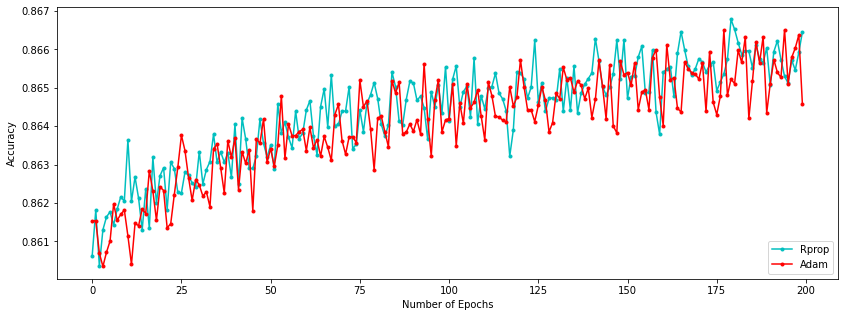

In [89]:
plt.figure(figsize=(14,5))
num_epochs = range(epochs)
plt.plot(num_epochs, accuracies, 'oc-', label='Rprop', markersize = 3)
plt.plot(num_epochs, acc_adam, 'or-', label='Adam', markersize = 3)
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [76]:
#Block to obtain test loss
# optimizer = Rprop(model.parameters(), lr=1e-5)
# optimizer_ = Adam(model.parameters(), lr=1e-5)
# inputs = torch.from_numpy(x_test_np).cuda().float()
# outputs = torch.from_numpy(y_test_np).cuda().float()
# print(inputs.size())
# print(outputs.size())
# tensor = TensorDataset(inputs, outputs)
# loader = DataLoader(tensor, batch_size, shuffle=True, drop_last=True)
# avg_loss, avg_accu, avg_prec, avg_rec = model_loss(model, loader, train=False, optimizer=optimizer)
# av_loss, av_accu, av_prec, av_rec = model_loss(model, loader, train=False, optimizer=optimizer_)
# f1 = (2*(avg_prec*avg_rec)/(avg_rec + avg_prec))
# f1_adam = (2*(av_prec*av_rec)/(av_rec + av_prec))
# print("Rprop: The Testing Resulting Average Loss = " + str(avg_loss) + "\n\tAccuracy = " + str(avg_accu) + "\n\tAverage Precision = " + str(avg_prec) + "\n\tAverage Recall = " + str(avg_rec) +  "\n\tF1 score = " + str(f1))
# print("Adam: The Testing Resulting Average Loss = " + str(avg_loss) +"\n\tAccuracy = " + str(av_accu) + "\n\tAverage Precision = " + str(av_prec) + "\n\tAverage Recall = " + str(av_rec) +  "\n\tF1 score = " + str(f1_adam))

torch.Size([46818, 1000])
torch.Size([46818, 5])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Rprop: The Testing Resulting Average Loss = 1.2972585727675996
	Accuracy = 0.8445046991330066
	Average Precision = 0.6113309708417596
	Average Recall = 0.6109513319679024
	F1 score = 0.6111410924472259
Adam: The Testing Resulting Average Loss = 1.2972585727675996
	Accuracy = 0.8419624978903315
	Average Precision = 0.604956119850188
	Average Recall = 0.6046688618409208
	F1 score = 0.6048124567369815
